<a href="https://www.kaggle.com/code/maksin/sentiment-analysis?scriptVersionId=137503796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


**Data Cleaning and pre-processing of Training dataset**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

In [4]:
df= pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")

In [5]:
df.head(15)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [6]:
df["Borderlands"].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [7]:
df["Positive"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [8]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
df_1=df.drop("2401",axis = 1)

In [11]:
df_2= df_1.rename(columns={"Borderlands":"Input_2","im getting on borderlands and i will murder you all ,":"Input_1","Positive": "labels"})

In [12]:
df_2.columns

Index(['Input_2', 'labels', 'Input_1'], dtype='object')

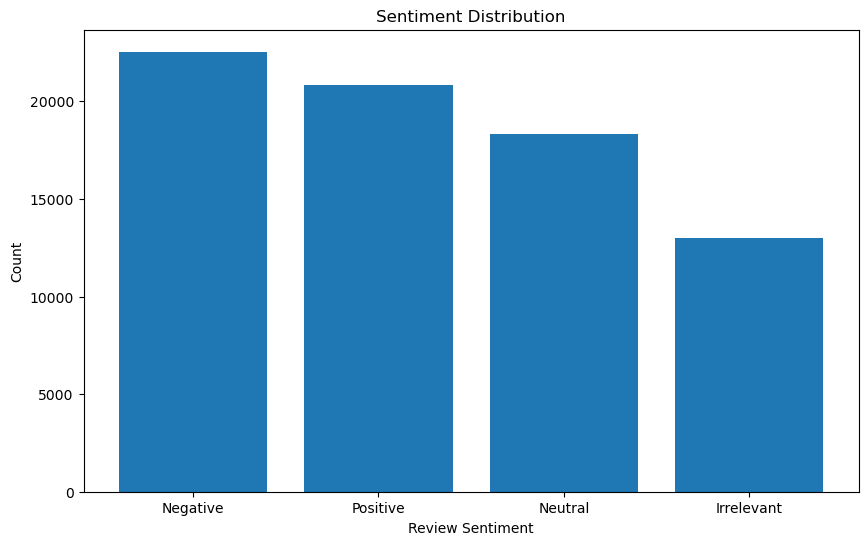

In [13]:
sentiment_counts = df_2['labels'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Review Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [14]:
df_2["Source_text"]= df_2["Input_1"].astype(str) +" "+ df_2["Input_2"].astype(str)

In [15]:
dfq= df_2.drop(["Input_1","Input_2"],axis=1)

In [16]:
dfq.head(10)

,labels,Source_text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
5,Positive,So I spent a few hours making something for fu...
6,Positive,So I spent a couple of hours doing something f...
7,Positive,So I spent a few hours doing something for fun...
8,Positive,So I spent a few hours making something for fu...
9,Positive,2010 So I spent a few hours making something f...


In [17]:
li=list(dfq["Source_text"])

Defining a function to remove numbers, special characters and stop words from the dataset

In [18]:
def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = text.lower().split()
    text = ' '.join([word for word in tokens if word not in stop_words])
    
    return text

In [19]:
dfq['Cleaned_text']=dfq['Source_text'].apply(clean_text)

/opt/conda/lib/python3.10/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/usr/share/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


In [20]:
dfq 

,labels,Source_text,Cleaned_text
0,Positive,I am coming to the borders and I will kill you...,coming borders kill borderlands
1,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill borderlands
2,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder borderlands
3,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder borderlands
4,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder borderlands
...,...,...,...
74676,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


In [21]:
Quality_df=dfq.drop('Source_text', axis=1)
Quality_df

,labels,Cleaned_text
0,Positive,coming borders kill borderlands
1,Positive,im getting borderlands kill borderlands
2,Positive,im coming borderlands murder borderlands
3,Positive,im getting borderlands murder borderlands
4,Positive,im getting borderlands murder borderlands
...,...,...
74676,Positive,realized windows partition mac like years behi...
74677,Positive,realized mac window partition years behind nvi...
74678,Positive,realized windows partition mac years behind nv...
74679,Positive,realized windows partition mac like years behi...


In [22]:
Quality_df["Cleaned_text"].isnull().any()

False

In [23]:
Quality_df['labels'].isnull().any()

False

In [24]:
Quality_df['word_count'] = Quality_df['Cleaned_text'].apply(lambda x: len(x.split()))

In [25]:
max_word_count = Quality_df['word_count'].max()
max_word_count

199

/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


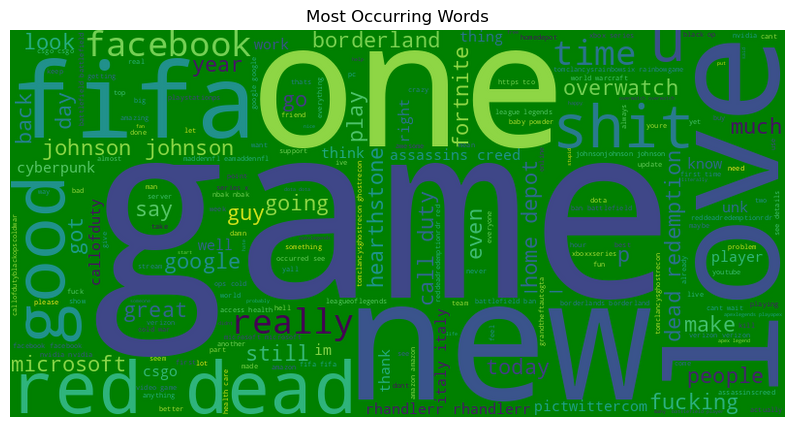

In [26]:
all_text = ' '.join(Quality_df['Cleaned_text'].values)
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(all_text)

# Create a figure and plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.title('Most Occurring Words')
plt.show()

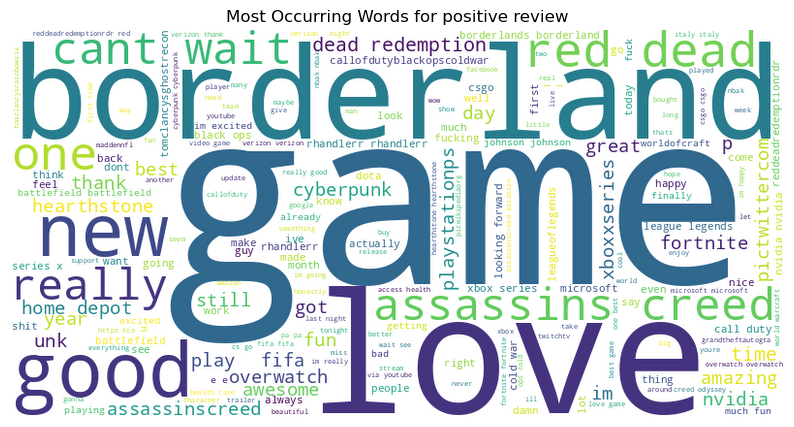

In [27]:
filtered_df = Quality_df[Quality_df['labels'] == 'Positive']
positive_text = ' '.join(filtered_df['Cleaned_text'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Create a figure and plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.title('Most Occurring Words for positive review')
plt.show()

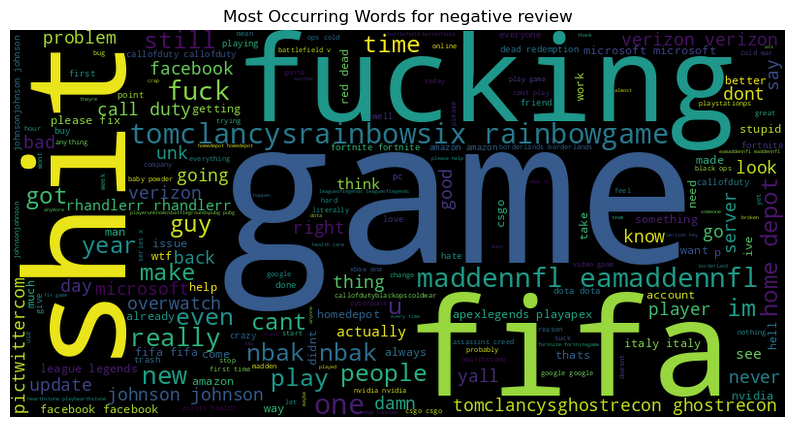

In [28]:
filtered_df = Quality_df[Quality_df['labels'] == 'Negative']
negative_text = ' '.join(filtered_df['Cleaned_text'].values)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Create a figure and plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.title('Most Occurring Words for negative review')
plt.show()

In [29]:
Q_dataset=Quality_df.drop(['word_count'], axis=1)
Q_dataset

,labels,Cleaned_text
0,Positive,coming borders kill borderlands
1,Positive,im getting borderlands kill borderlands
2,Positive,im coming borderlands murder borderlands
3,Positive,im getting borderlands murder borderlands
4,Positive,im getting borderlands murder borderlands
...,...,...
74676,Positive,realized windows partition mac like years behi...
74677,Positive,realized mac window partition years behind nvi...
74678,Positive,realized windows partition mac years behind nv...
74679,Positive,realized windows partition mac like years behi...


**Data Cleaning and Preprocessing of Test dataset**

In [30]:
test_df=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv")

In [31]:
test_df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [32]:
test_data= test_df.drop(["3364","Facebook"], axis=1)

In [33]:
t_data=test_data.rename(columns={"Irrelevant":"labels","I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣":"Input_text"})

In [34]:
t_data

,labels,Input_text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [35]:
t_data["Cleaned_text"]=t_data["Input_text"].apply(clean_text)

/opt/conda/lib/python3.10/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/usr/share/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


In [36]:
test=t_data.drop("Input_text", axis=1)

In [37]:
test

,labels,Cleaned_text
0,Neutral,bbc news amazon boss jeff bezos rejects claims...
1,Negative,microsoft pay word functions poorly samsungus ...
2,Negative,csgo matchmaking full closet hacking truly awf...
3,Neutral,president slapping americans face really commi...
4,Negative,hi eahelp ive madeleine mccann cellar past yea...
...,...,...
994,Irrelevant,toronto arts culture capital canada wonder wan...
995,Irrelevant,actually good move tot bring viewers one peopl...
996,Positive,today sucked time drink wine n play borderland...
997,Positive,bought fraction microsoft today small wins


In [38]:
test["labels"].isnull().any()

False

In [39]:
test["Cleaned_text"].isnull().any()

False

**Implementing TFidf Vectorizer**

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(Q_dataset['Cleaned_text'])
test_vectors = vectorizer.transform(test['Cleaned_text'])

**Implementing the SVM model to classify the data and get the predictions on test data, along with model's performance metric**

In [41]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, Q_dataset['labels'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test['labels'], prediction_linear, output_dict=True)
print('positive: ', report['Positive'])
print('negative: ', report['Negative'])
print('neutral: ', report['Neutral'])

Training time: 945.213019s; Prediction time: 4.882881s
positive:  {'precision': 0.9277566539923955, 'recall': 0.8808664259927798, 'f1-score': 0.9037037037037037, 'support': 277}
negative:  {'precision': 0.9051094890510949, 'recall': 0.9323308270676691, 'f1-score': 0.9185185185185184, 'support': 266}
neutral:  {'precision': 0.9360902255639098, 'recall': 0.8736842105263158, 'f1-score': 0.9038112522686025, 'support': 285}
